Title: WIDS Palm Oil Plantation Prediction

Date : February  2019

Plan:

**First things First: snacks and chip checked, Coffee checked**

  1- Introduction
  
    - Data Field and Description
    
  2 -  Importing Libraries
    
  3 - Explore the dataset
    
    - Feature exploration and Cleaning
    
  4- Training using Convolution Neural Networks


# Introduction: 

This competiton touches on one of the major agricultural problems facing many Palm oil producing countries-  Deforestaion, biodiversity loss and Increase Green house emission.

Palm oil (Elæis guineensis) is the main cooking ingredient in the most tropical parts of the world like  Brazil, South East Asia and tropical part of Africa(particularly in Cameroon where i grew up). Extracted from the pulp of the fruit, this staple has so many uses and virtues. 

**To the Health:**

* Palm oil reduces cholestorol levels and some stusdies have found that palm oil can reduce the amount of bad LDL cholesterol in our body, keeping the hearts healthy and strong. Which brings us to the second virtue
* It slows the progression of Heart diseases
* Boosts Brain Health as it is jam-packed with a from of Vitamin E(tocotienol)  which has beneficial effects on brain health, skin and hair health too.
* Plam oil is an excellent source of the Vitamin A supplement -Beta-Carotene, whihc is important for maintaining good eye health, Also beneficial to pregnant women and their babies. ( Just a little anecdote: In my Country Cameroon, whenever an old women sees you wearing prescription eyeglasses, she will tell you "Come on!!! Take that thing off your eyes and consume more Palm oil". Happens to me all the time :') )
* Palm oil is high in beneficial antioxidant, which has been shown to reduce inflammation and Oxidative stress caused by free radicals.

**Additionally:**
 * It is also the cheapest vegetable oil in the world
 * Plam oil also produces palm kernel oil extracted from the endosperm which is mainly used in the cosmetics industry.  
 * Palm kernel waste (after the oil has beenextracted) is also used as animal feed and in co-firing in electricity generation.
 * it also has a natural preservative effect which extends the shelf life of food products That is why it is about half the package products sold in our grocery stores. From shampoo to detergents, to lipsticks, to bread, to cookies and even our Biodiesels, palm oil is present everywhere.
 
 **BUT BUT BUT.....** 
 * Plam oils cultivation is responsible for direct damage to flora and wildlife habitats due to forest conversion and the influx of palm oil workers increases pressure on wildlife through hunting .
 * Plam oils deforestation as a result of forest being destroyed, to keep up with the growing demands for palm oil, hence increasing greeenhouse gas emissions.
 * Palm oil production has major negative environmental consequences on soils (erosion potential on steep slopes) and water quality (pollution by pesticide run-off).
 * There has also been reports of Human rights violations by coorporations and companies that produce palm oil. Some of the issues incude, unsafe working conditions for the workers, Very low pay etc.
 
Despite the positive impacts and vitues of palm oil, its expansion has led to deforestation, increased carbon emissions, and biodiversity loss,.
 
# About the Challenge:

The challenge is to create a model that predicts the presence of oil palm plantations in satellite imagery. The datathon task is to train a model that takes as input a satellite image and outputs a prediction of how likely it is that the image contains an oil palm plantation. 

The dataset images are 3-meter spatial resolution, and each is labeled with whether an oil palm plantation appears in the image (0 for no plantation, 1 for any presence of a plantation).

Labeled training and test datasets are provided for model development.

# sOurce:
* https://news.mongabay.com/2016/04/palm-oil-cameroon-blessing-curse-small-scale-farmers-2/
* http://awsassets.panda.org/downloads/palmoildevelopmentcameroon_english.pdf
* https://www.excelvite.com/red-palm-oil-benefits-the-heart-brain-but-is-it-bad-for-the-environment/

**Data Fields and Description:**

**image_id** - an anonymous id unique to a given image.

**has_oilpalm** - the annotation or label for a given image, with 0 indicating no oil palm, and 1 indicating presence of oil palm plantations.

**score** - confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result. For more details on how these scores are calculated, visit this article. Please note that this is extra data that need not be incorporated in your model, but may be useful. In addition, stay tuned for a blogpost focused more deeply on the data annotation process and more!

# 1- Importing Libraries

In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Loading and Reading data

In [2]:
# #Loading the images paths
# img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
# img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
# img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

#Image paths (Amy)
img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

In [3]:
# #oading the .csv file
# data = pd.read_csv(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\traininglabels (1).csv")
# data.sample(5)

#Label path (Amy)
data = pd.read_csv(r"C:\Users\Amy\KaggleProject\data\traininglabels.csv")
data.sample(5)

,image_id,has_oilpalm,score
5381,img_078582017.jpg,0,1.0000
10840,img_048602018.jpg,0,1.0000
9110,img_023502018.jpg,0,1.0000
11444,img_057222018.jpg,0,1.0000
6173,img_090162017.jpg,0,0.8127


# 3 - Data Preprocessing

In [4]:
data.describe()

,has_oilpalm,score
count,15244.000000,15244.000000
mean,0.061795,0.955769
std,0.240790,0.109367
min,0.000000,0.388700
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [6]:
data['has_oilpalm'].value_counts(normalize = True)

0    0.938205
1    0.061795
Name: has_oilpalm, dtype: float64

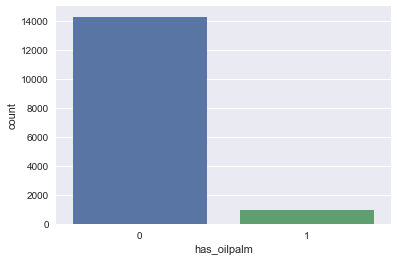

In [7]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'has_oilpalm', data = data)

In [59]:
data['score'].value_counts(normalize = True).head()

1.0000    0.834623
0.8000    0.001706
0.7992    0.001181
0.7981    0.001115
0.7976    0.000984
Name: score, dtype: float64

***************************************************************************************************************************

# Todo 1- Lets take a look at the different classes- 0 and 1

In [10]:
# We separate the classes 

label_1 = data[data['has_oilpalm']==1]
label_0 = data[data['has_oilpalm']==0]

In [11]:
# Plot the images in label 1
label_1.head()

,image_id,has_oilpalm,score
72,img_001092017.jpg,1,0.3944
75,img_001132017.jpg,1,1.0000
109,img_001712017.jpg,1,0.7543
129,img_002012017.jpg,1,1.0000
143,img_002232017.jpg,1,1.0000


In [12]:
label_1.shape

(942, 3)

In [15]:
label_0.shape

(14302, 3)

In [17]:
data.shape

(15244, 3)

To ease the image reading process we can create an additional column to the dataset with the global path of the images

In [19]:
label_1['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_1['image_id']]
label_0['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_0['image_id']]
label_1.head()

C:\Users\Amy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Amy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,image_id,has_oilpalm,score,image_path
72,img_001092017.jpg,1,0.3944,C:\Users\Amy\KaggleProject\data\train_images\i...
75,img_001132017.jpg,1,1.0000,C:\Users\Amy\KaggleProject\data\train_images\i...
109,img_001712017.jpg,1,0.7543,C:\Users\Amy\KaggleProject\data\train_images\i...
129,img_002012017.jpg,1,1.0000,C:\Users\Amy\KaggleProject\data\train_images\i...
143,img_002232017.jpg,1,1.0000,C:\Users\Amy\KaggleProject\data\train_images\i...


In [21]:
# We plot some of the pictures in the label_1 just to have an idea of what a plantation with oilpalm look like

haspalm_images = np.random.choice(label_1['image_path'],5)
nopalm_images = np.random.choice(label_0['image_path'],5)
haspalm_images  


array(['C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_056872017.jpg',
       'C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_073632018.jpg',
       'C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_102782018.jpg',
       'C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_045112017.jpg',
       'C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_025972017.jpg'],
      dtype=object)

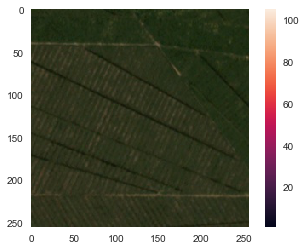

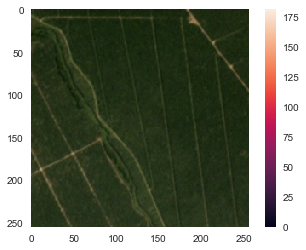

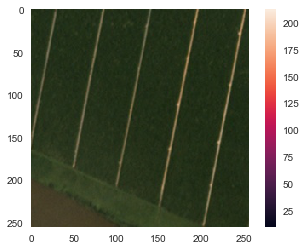

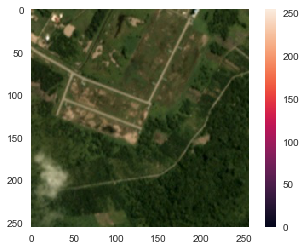

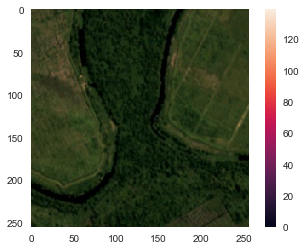

In [22]:
from PIL import Image

for image in haspalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

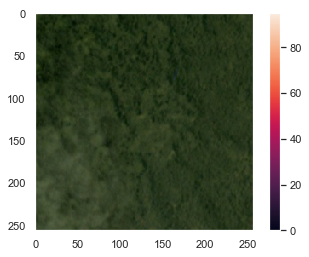

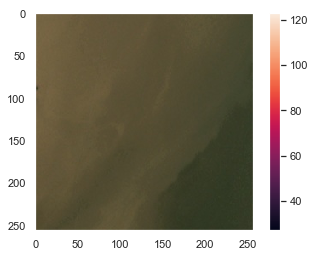

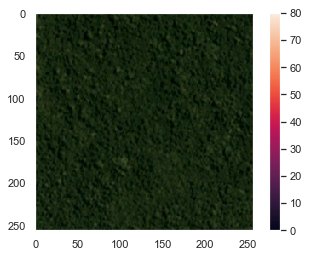

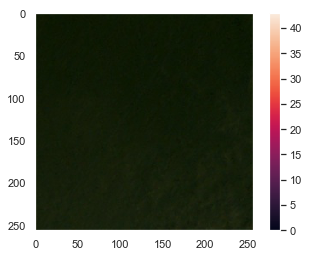

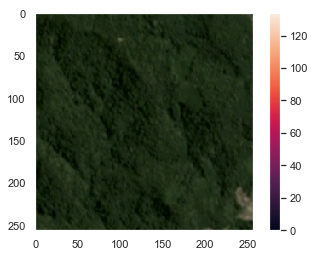

In [49]:
for image in nopalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

# Edge Detection
perform edge detection to enhance the visibility of oilpalm field lines

-Install sci-kit image : http://scikit-image.org/docs/stable/install.html

In [1]:
from skimage.color import rgb2gray
from skimage import io

# convert rgb to grayscale
img_path = 'C:\\Users\\Amy\\KaggleProject\\data\\train_images\\img_073632018.jpg'
img = io.imread(img_path)
img_gray = rgb2gray(img)


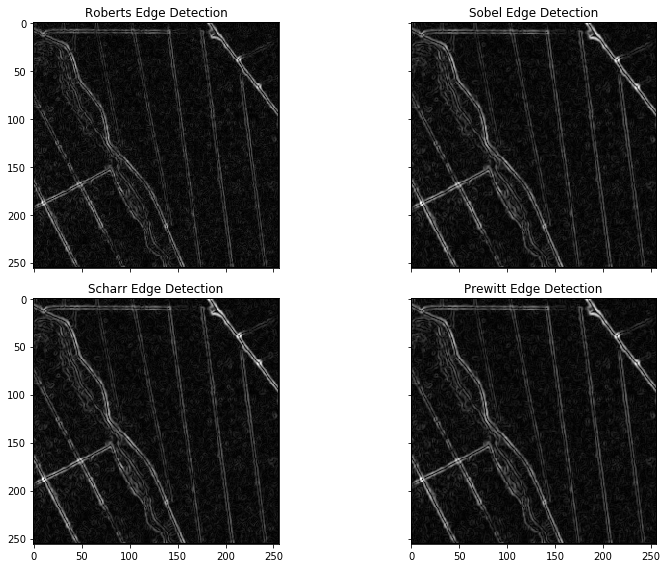

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

# Filter using sobel and robert to perform edge detection
edge_roberts = roberts(img_gray)
edge_sobel = sobel(img_gray)
edge_scharr = scharr(img_gray)
edge_prewitt = prewitt(img_gray)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                       figsize=(12, 8))

ax[0][0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0][0].set_title('Roberts Edge Detection')

ax[0][1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[0][1].set_title('Sobel Edge Detection')

ax[1][0].imshow(edge_scharr, cmap=plt.cm.gray)
ax[1][0].set_title('Scharr Edge Detection')

ax[1][1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1][1].set_title('Prewitt Edge Detection')

# for a in ax:
#     a.axis('off')

plt.tight_layout()
plt.show()

## OBSERVATION:
- There are about 15 244 images with an equal number of score and max of 1 signifies that there is an oil palm while a 0 means no oil palm.

- There are non Null of NaN columns since the number of 'counts' in the data.describe are equivalent

- This dataset is very biase. 93 percent of the images(which corresponds to 14 302 images) does not have oilpalms while only 6 percent has oilpalms( approx. 942 images). Same with the scores, 83 percent of all scores are 1 while the remaining scores are about 16 percent.

- We can also see that the images with oil palms on them have some kind of stratifications on them while does with no oilpalms do not have these divisions.


****************************************************************************************************************************

# Todo 2 - Split the Training set into training and validation set while preserving the ratio of 1 and 0

In [23]:
from sklearn.model_selection import train_test_split

features = [x for x in data if x!= 'has_oilpalm']
X = data[features]
y = data['has_oilpalm']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.30)

In [ ]:
#comparing the ratios of classes in both splits. Very representative of the whole data set

In [24]:
y_train.value_counts(normalize = True)

0    0.938238
1    0.061762
Name: has_oilpalm, dtype: float64

In [25]:
y_test.value_counts(normalize = True)

0    0.938129
1    0.061871
Name: has_oilpalm, dtype: float64

*******************************************************************************************************************************

# Todo 3 - Transfer Learning:

Use this link guide to install tensorflow: https://medium.com/@margaretmz/anaconda-jupyter-notebook-tensorflow-and-keras-b91f381405f8

In [60]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [9]:
num_classes = 2

model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet',pooling='avg'))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False     #freezing the weight to keep it unaltered

model.compile(optimizer='sgd', loss='binary', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#train set
train_generator = ImageDataGenerator(rescale = 1./255)
train_set = train_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images',
    target_size = (64, 64),
    batch_size = 100,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)
 

# Resource
Model: https://keras.io/applications/#resnet

# 4- Image Classification using Convolution Neural Network

**Image classification using CNN is always done in 3 parts**

1. Convolution:
2. Pooling
3. Flatenning
4. Full Connection

In [33]:
# Importing the Keras libraries and packages
from keras.models import Sequential       

from keras.layers import Conv2D           

from keras.layers import MaxPooling2D

from keras.layers import Flatten

from keras.layers import Dense
 

**Explanations:**

**Step 1** - To initialise our neural network as a sequential network

**Step 2** - To perform the convolution operation on the training inmage. 2D becasue we are working with images, which are basically 2D arrays.

**Step 3** - Used for pooling operations- simplifies the image collected by the convolutional layer and creates a condensed version of the information contained in them.

**Step 4** - Used for flettening the convolutional array. Flatteening is the process of converting the 2D arrays into single linear continuous array.

**Step 5** - To perfrom the ful connnection stated above

In [34]:
# We create an object of the sequential class
model = Sequential()

In [35]:
# Step 1- Convolution step:
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

This step takes 4 parameters: 

* 32 is the number of filters.

* (3,3) is the shape of each filter.

* input_shape our cnn will take = (64, 64, 3) - 64 by 64 resolution and 3 for RBG color image.

* 'Relu' recifier funtion will be our activation function

In [36]:
# Step 2- Pooling step:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [37]:
# Step 3 - Flattening
model.add(Flatten())

In [38]:
#step 4 - Full connection
model.add(Dense(128, activation = 'relu'))

Dense is the function to add a fully connected layer. The unit(in this case 128) is the number of nodes that should be present in the hidden layer. We will treak it until we get the optimal unit

Since we are dealing with a Binary classification problem( either hasoilpalm or not), We will initialise our output layer so that it has just a single node.

In [39]:
# Initialising output node
model.add(Dense(units = 1, activation = 'sigmoid'))

In [40]:
# Now we compile our CNN
#learning_rate = .01
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer='adam',   #Try adam  next and see how it goes
              metrics=['accuracy'])

# 5- Training the CNN to the images

 **Image Preprocessing**

In [10]:
from keras.preprocessing.image import ImageDataGenerator

#train set

train_generator = ImageDataGenerator(rescale = 1./255)
train_set = train_generator.flow_from_directory( 
    directory= r'C:\Users\Amy\KaggleProject\data\train_images',
    target_size = (64, 64),
    batch_size = 100,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)

# img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
# img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

Using TensorFlow backend.


Found 0 images belonging to 0 classes.


In [46]:
#validation set

valid_generator = ImageDataGenerator(rescale = 1./255)
valid_set = valid_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data',
    target_size = (64, 64),
    batch_size = 100,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)
 
#test set

test_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data',
    target_size = (64, 64),
    batch_size = 100,
    class_mode = 'binary',
    shuffle=True,
    seed = 42
)


Found 2178 images belonging to 1 classes.
Found 4356 images belonging to 1 classes.


In [47]:
# from keras import utils

# num_classes = 2
# train_set = utils.to_categorical(train_set, num_classes)
# #valid_set = utils.to_categorical(valid_set, num_classes)


**Fitting the images**

In [48]:
STEP_SIZE_TRAIN=train_set.n//train_set.batch_size

STEP_SIZE_VALID=valid_set.n//valid_set.batch_size

history = model.fit_generator(train_set,
            steps_per_epoch=STEP_SIZE_TRAIN,
            epochs = 5,
            validation_data = valid_set,
            validation_steps=STEP_SIZE_VALID)

Epoch 1/5
152/152 [==============================] - 111s 732ms/step - loss: 0.0047 - acc: 0.9942 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/5
152/152 [==============================] - 98s 642ms/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/5
152/152 [==============================] - 101s 662ms/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/5
152/152 [==============================] - 65s 425ms/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 5/5
152/152 [==============================] - 13155s 87s/step - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000


In [ ]:
Observation:
- We can see that the images fall in the range 0 - 255

Referencec:
- https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://www.kaggle.com/jhonatansilva31415/whales-a-simple-guide